Compare NEMO 3.6 tidal curretns with NEMO 3.4

In [1]:
import datetime
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io as sio

from salishsea_tools import viz_tools
from salishsea_tools import ellipse
from salishsea_tools.nowcast import research_VENUS

import baroclinic as bc
%matplotlib inline

In [2]:
SITES=research_VENUS.SITES['VENUS']

# Tides

Now look at the tidal analysis for each case.

##  Surface 
### M2 major 

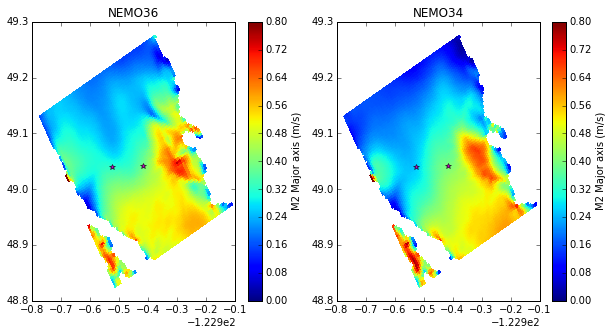

In [3]:
const='M2'
fig, axs = plt.subplots(1,2,figsize=((10,5)))
runs = {'NEMO34': '/data/nsoontie/MEOPAR/SalishSea/results/tides/bathymods/bathy2_nowinds/surface_tides.mat',
        'NEMO36':'/data/nsoontie/MEOPAR/SalishSea/results/tides/TS4/surface_tides.mat'}

for run, ax in zip(runs, axs):
    data =sio.loadmat(runs[run])
    datastruc = data['datastruc']
    lats = datastruc['lats'][0,0]
    lons = datastruc['lons'][0,0]
    
    major, minor, phase, incli= bc.get_constituent(const ,datastruc)
    mesh=ax.pcolormesh(lons, lats, major, vmin=0,vmax=0.8)
    cbar = plt.colorbar(mesh, ax=ax)
    cbar.set_label('M2 Major axis (m/s)')
    
    ax.set_title(run)
    #Add bathymetry contours
    ax.plot(SITES['Central']['lon'], SITES['Central']['lat'], 'm*', label='Central')
    ax.plot(SITES['East']['lon'], SITES['East']['lat'], 'm*',label = 'East')
    
    #Axis limits
    ax.set_xlim([-123.7,-123])
    ax.set_ylim([48.8,49.3])

## Baroclinic 
### M2 Major at Surface

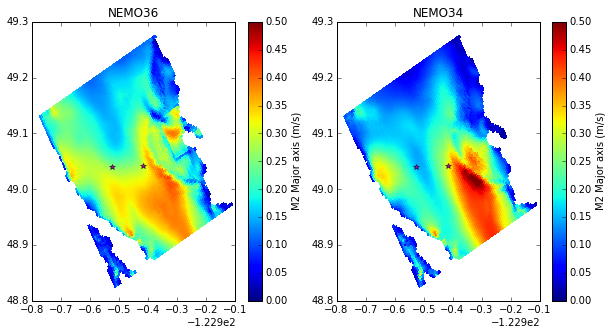

In [4]:
const='M2'
fig, axs = plt.subplots(1,2,figsize=((10,5)))
runs = {'NEMO34': '/data/nsoontie/MEOPAR/SalishSea/results/tides/bathymods/bathy2_nowinds/baroclinic_tides_masked.mat',
        'NEMO36':'/data/nsoontie/MEOPAR/SalishSea/results/tides/TS4/baroclinic_tides_masked.mat'}

for run, ax in zip(runs, axs):
    data =sio.loadmat(runs[run])
    datastruc = data['datastruc']
    lats = datastruc['lats'][0,0]
    lons = datastruc['lons'][0,0]
    
    major, minor, phase, incli= bc.get_constituent(const ,datastruc)
    mesh=ax.pcolormesh(lons, lats, major[:,:,0], vmin=0,vmax=0.5)
    cbar = plt.colorbar(mesh, ax=ax)
    cbar.set_label('M2 Major axis (m/s)')
    
    ax.set_title(run)
    #Add bathymetry contours
    ax.plot(SITES['Central']['lon'], SITES['Central']['lat'], 'm*', label='Central')
    ax.plot(SITES['East']['lon'], SITES['East']['lat'], 'm*',label = 'East')
    
    #Axis limits
    ax.set_xlim([-123.7,-123])
    ax.set_ylim([48.8,49.3])

## Barotropic
### M2

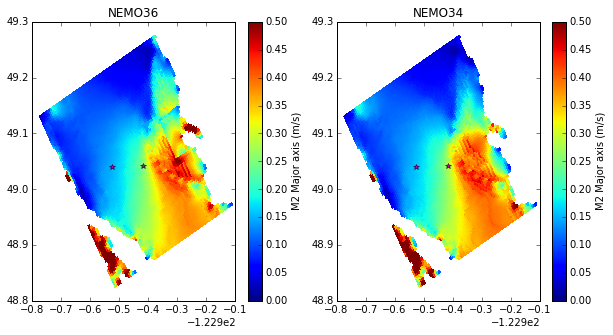

In [5]:
const='M2'
fig, axs = plt.subplots(1,2,figsize=((10,5)))
runs = {'NEMO34': '/data/nsoontie/MEOPAR/SalishSea/results/tides/bathymods/bathy2_nowinds/barotropic_tides_masked.mat',
        'NEMO36':'/data/nsoontie/MEOPAR/SalishSea/results/tides/TS4/barotropic_tides_masked.mat'}

for run, ax in zip(runs, axs):
    data =sio.loadmat(runs[run])
    datastruc = data['datastruc']
    lats = datastruc['lats'][0,0]
    lons = datastruc['lons'][0,0]
    
    major, minor, phase, incli= bc.get_constituent(const ,datastruc)
    mesh=ax.pcolormesh(lons, lats, major, vmin=0,vmax=0.5)
    cbar = plt.colorbar(mesh, ax=ax)
    cbar.set_label('M2 Major axis (m/s)')
    
    ax.set_title(run)
    #Add bathymetry contours
    ax.plot(SITES['Central']['lon'], SITES['Central']['lat'], 'm*', label='Central')
    ax.plot(SITES['East']['lon'], SITES['East']['lat'], 'm*',label = 'East')
    
    #Axis limits
    ax.set_xlim([-123.7,-123])
    ax.set_ylim([48.8,49.3])